In [1]:
'''!wget https://drive.google.com/file/d/1l8lrpI1sk5wp4dN-6WKZ9g3BRcBIvax0/view?usp=sharing

!gdown --id 1l8lrpI1sk5wp4dN-6WKZ9g3BRcBIvax0

# Unzip the downloaded file
!unzip -q braintumor3.zip

# List the files to confirm extraction
!ls'''

'!wget https://drive.google.com/file/d/1l8lrpI1sk5wp4dN-6WKZ9g3BRcBIvax0/view?usp=sharing\n\n!gdown --id 1l8lrpI1sk5wp4dN-6WKZ9g3BRcBIvax0\n\n# Unzip the downloaded file\n!unzip -q braintumor3.zip\n\n# List the files to confirm extraction\n!ls'

##Importing Dataset


In [2]:
import os
for dirpath, dirnames, filenames in os.walk("braintumor3"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'braintumor3'.
There are 2 directories and 0 images in 'braintumor3\test'.
There are 0 directories and 405 images in 'braintumor3\test\absent'.
There are 0 directories and 906 images in 'braintumor3\test\present'.
There are 2 directories and 0 images in 'braintumor3\train'.
There are 0 directories and 1595 images in 'braintumor3\train\absent'.
There are 0 directories and 4117 images in 'braintumor3\train\present'.


In [3]:
# No. of images
num_tumor_present_train = len(os.listdir("braintumor3/train/present"))
num_tumor_present_train

4117

In [4]:
# Class Names
import pathlib
import numpy as np
data_dir = pathlib.Path("braintumor3/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['absent' 'present']


##Visualisation


Image shape: (512, 512)


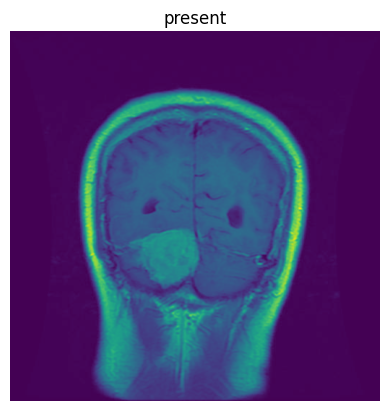

In [5]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}")
  return img

img = view_random_image(target_dir="braintumor3/train/",
                        target_class="present")

In [6]:
# Normalisation/Scaling
img/255.

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##Model Building

In [7]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
# Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "braintumor3/train/"
test_dir = "braintumor3/test/"

# data into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
# Create a CNN model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"), # /same
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 5712 images belonging to 2 classes.
Found 1311 images belonging to 2 classes.


d:\vit study\self preparation\machine learning\Brain Tumor Detection System\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\vit study\self preparation\machine learning\Brain Tumor Detection System\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 183s 1s/step - accuracy: 0.8419 - loss: 0.4067 - val_accuracy: 0.9153 - val_loss: 0.2748
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 36s 200ms/step - accuracy: 0.9483 - loss: 0.1606 - val_accuracy: 0.9405 - val_loss: 0.1744
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 38s 211ms/step - accuracy: 0.9609 - loss: 0.1195 - val_accuracy: 0.9321 - val_loss: 0.2188
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 35s 195ms/step - accuracy: 0.9716 - loss: 0.0876 - val_accuracy: 0.9710 - val_loss: 0.0914
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 36s 202ms/step - accuracy: 0.9804 - loss: 0.0641 - val_accuracy: 0.9504 - val_loss: 0.1167


In [8]:
# Summary
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

#Visualisation

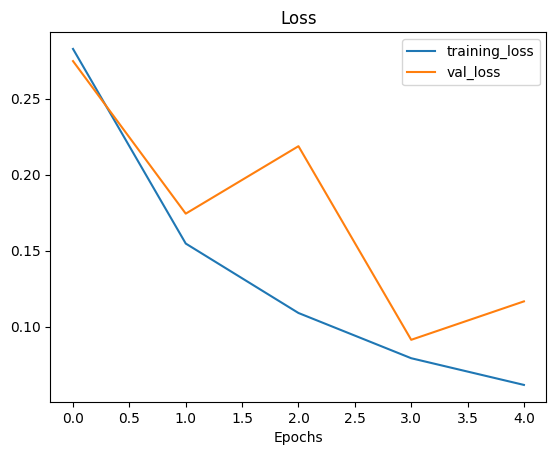

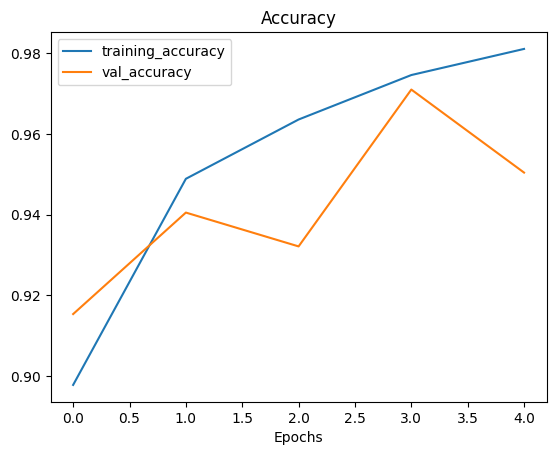

In [9]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss curves
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy curves
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

plot_loss_curves(history_1)

Image shape: (512, 512)
Image shape: (252, 200, 3)


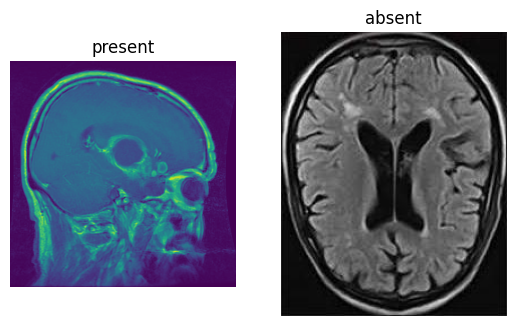

In [10]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
tumor_present = view_random_image("braintumor3/train/", "present")
plt.subplot(1, 2, 2)
tumor_absent = view_random_image("braintumor3/train/", "absent")

Modifying Model


In [11]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

d:\vit study\self preparation\machine learning\Brain Tumor Detection System\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 25s 128ms/step - accuracy: 0.7111 - loss: 0.6842 - val_accuracy: 0.6911 - val_loss: 0.6653
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 19s 108ms/step - accuracy: 0.7145 - loss: 0.6553 - val_accuracy: 0.6911 - val_loss: 0.6462
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 18s 103ms/step - accuracy: 0.7240 - loss: 0.6315 - val_accuracy: 0.6911 - val_loss: 0.6337
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 26s 147ms/step - accuracy: 0.7223 - loss: 0.6173 - val_accuracy: 0.6911 - val_loss: 0.6262
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 26s 144ms/step - accuracy: 0.7257 - loss: 0.6057 - val_accuracy: 0.6911 - val_loss: 0.6217


In [12]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

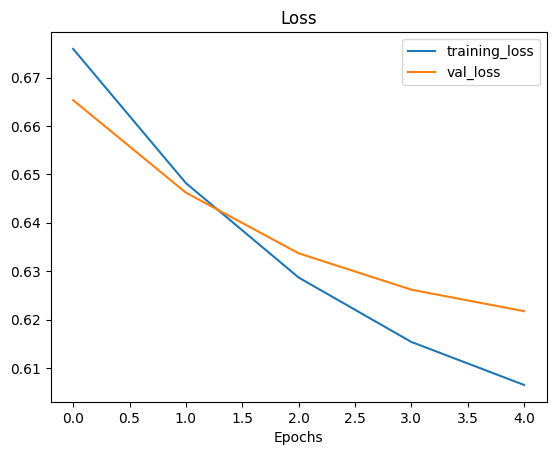

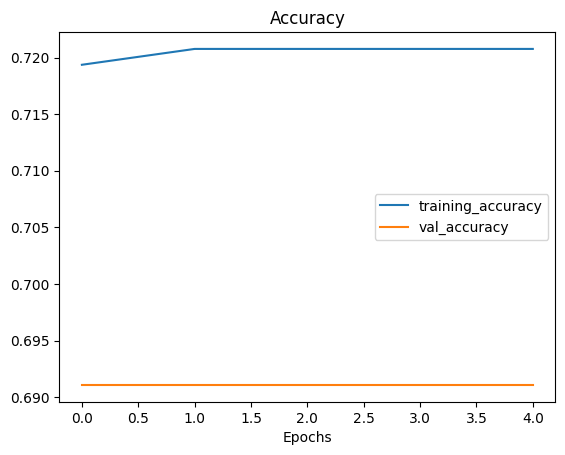

In [13]:
plot_loss_curves(history_2)

In [14]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 48s 253ms/step - accuracy: 0.7408 - loss: 1.6218 - val_accuracy: 0.8947 - val_loss: 0.3981
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 44s 246ms/step - accuracy: 0.9395 - loss: 0.2061 - val_accuracy: 0.8810 - val_loss: 0.4350
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 44s 245ms/step - accuracy: 0.9379 - loss: 0.1880 - val_accuracy: 0.9275 - val_loss: 0.2179
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 44s 248ms/step - accuracy: 0.9420 - loss: 0.1877 - val_accuracy: 0.9321 - val_loss: 0.2359
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 43s 240ms/step - accuracy: 0.9681 - loss: 0.1047 - val_accuracy: 0.9230 - val_loss: 0.2599


In [15]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

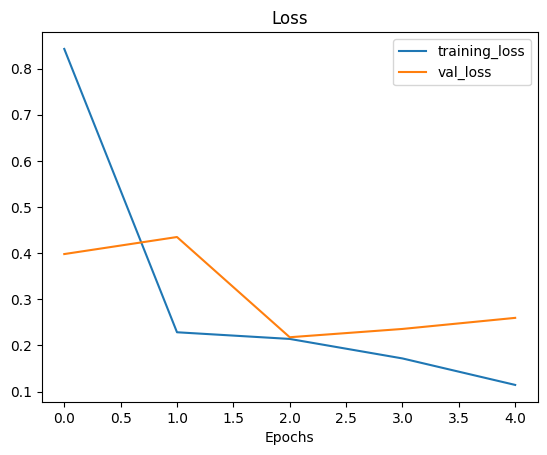

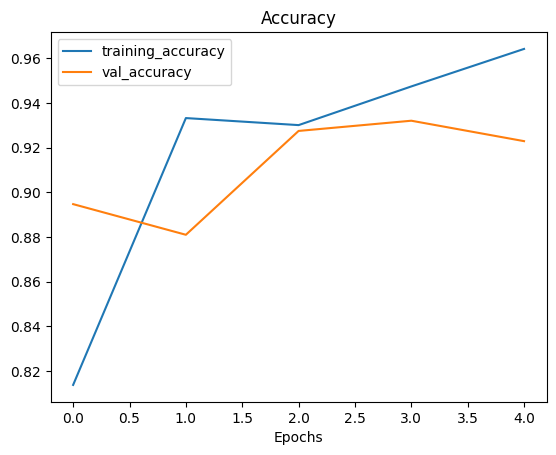

In [16]:
plot_loss_curves(history_3)

In [17]:
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 42s 220ms/step - accuracy: 0.7948 - loss: 0.7870 - val_accuracy: 0.9626 - val_loss: 0.1240
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 38s 213ms/step - accuracy: 0.9779 - loss: 0.0707 - val_accuracy: 0.9855 - val_loss: 0.0532
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 37s 207ms/step - accuracy: 0.9973 - loss: 0.0153 - val_accuracy: 0.9931 - val_loss: 0.0225
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 39s 219ms/step - accuracy: 0.9983 - loss: 0.0057 - val_accuracy: 0.9939 - val_loss: 0.0238
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 39s 218ms/step - accuracy: 1.0000 - loss: 6.7462e-04 - val_accuracy: 0.9954 - val_loss: 0.0257


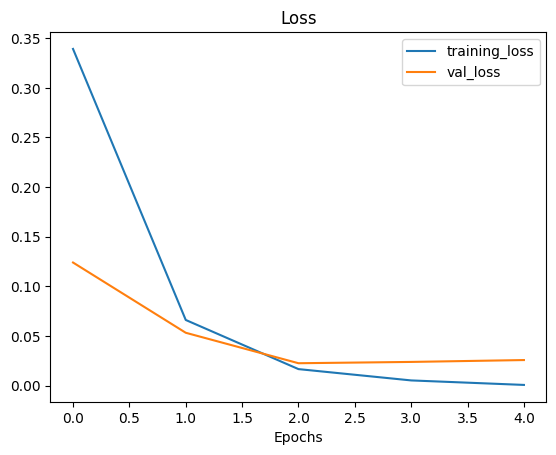

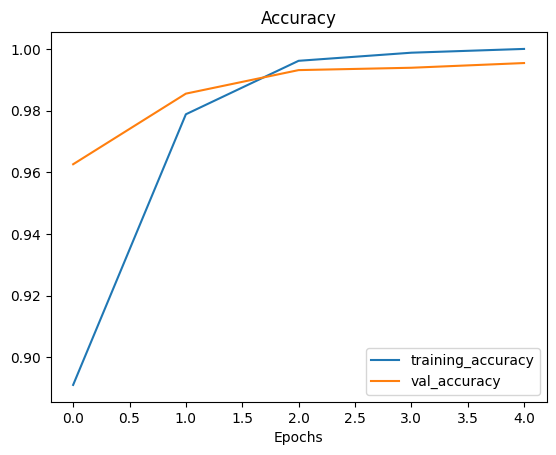

In [18]:
plot_loss_curves(history_4)

In [19]:
model_5 = tf.keras.models.Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 32s 167ms/step - accuracy: 0.8205 - loss: 0.4268 - val_accuracy: 0.9169 - val_loss: 0.2660
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 34s 188ms/step - accuracy: 0.9499 - loss: 0.1582 - val_accuracy: 0.9329 - val_loss: 0.2312
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 32s 176ms/step - accuracy: 0.9622 - loss: 0.1247 - val_accuracy: 0.9329 - val_loss: 0.1701
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 31s 172ms/step - accuracy: 0.9650 - loss: 0.1002 - val_accuracy: 0.9535 - val_loss: 0.1342
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 32s 177ms/step - accuracy: 0.9762 - loss: 0.0819 - val_accuracy: 0.9680 - val_loss: 0.0946


In [20]:
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

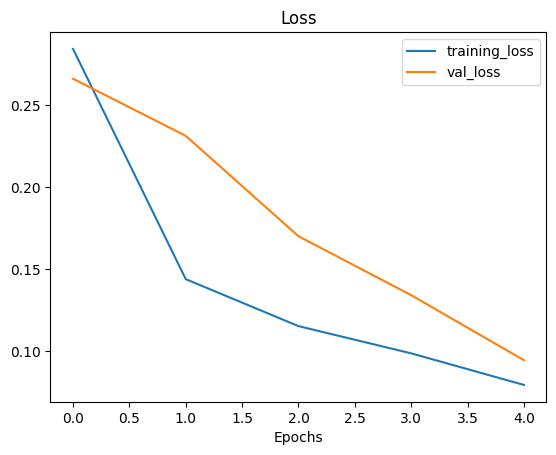

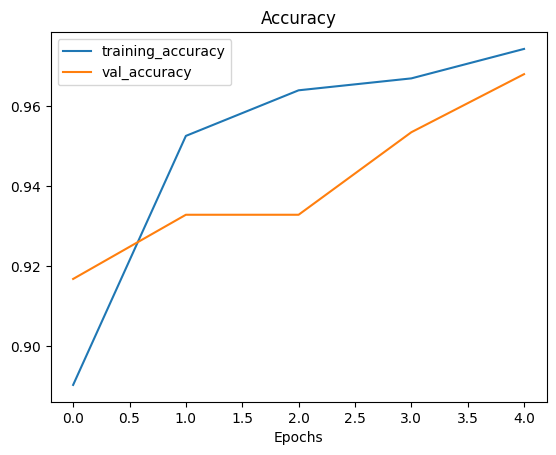

In [21]:
plot_loss_curves(history_5)

##Reduce Overfitting

In [22]:
# data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

train_dir = "braintumor3/train/"
test_dir = "braintumor3/test/"

In [23]:
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 5712 images belonging to 2 classes.
Non-augmented training images:
Found 5712 images belonging to 2 classes.
Unchanged test images:
Found 1311 images belonging to 2 classes.


In [24]:
# Get data batch samples
images, labels = next(train_data)
augmented_images,labels =next(train_data_augmented)

Before augmentationa vs after augmentaion

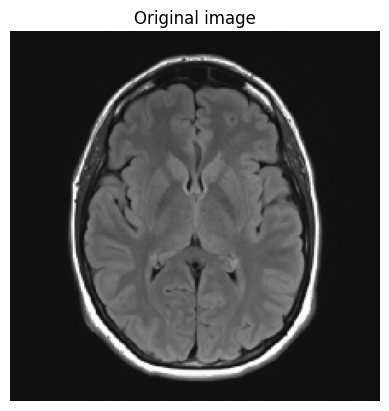

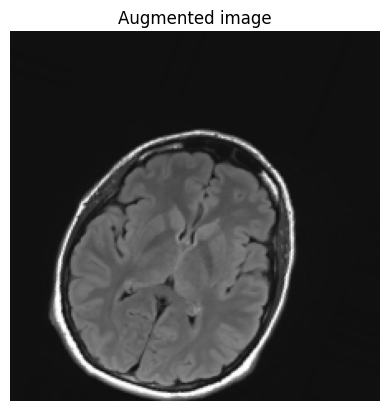

In [25]:
# Show original image and augmented image
random_number = random.randint(0, 31)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Model with data augmentation

In [26]:
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 92s 509ms/step - accuracy: 0.7519 - loss: 0.6964 - val_accuracy: 0.6041 - val_loss: 0.6545
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 87s 485ms/step - accuracy: 0.7486 - loss: 0.5486 - val_accuracy: 0.7292 - val_loss: 0.5582
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 84s 469ms/step - accuracy: 0.8254 - loss: 0.4211 - val_accuracy: 0.8284 - val_loss: 0.3658
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 90s 501ms/step - accuracy: 0.8648 - loss: 0.3336 - val_accuracy: 0.8818 - val_loss: 0.4205
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 84s 466ms/step - accuracy: 0.9133 - loss: 0.2688 - val_accuracy: 0.7918 - val_loss: 0.4359


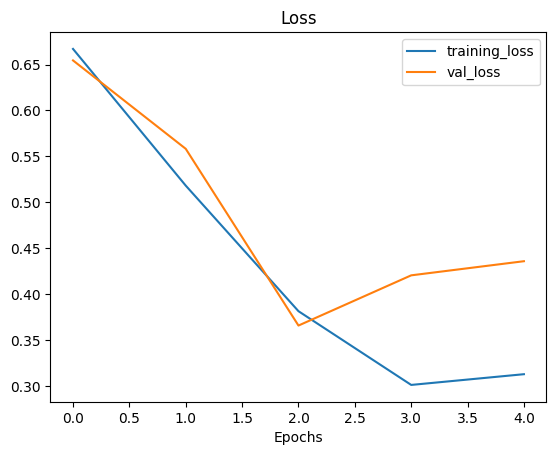

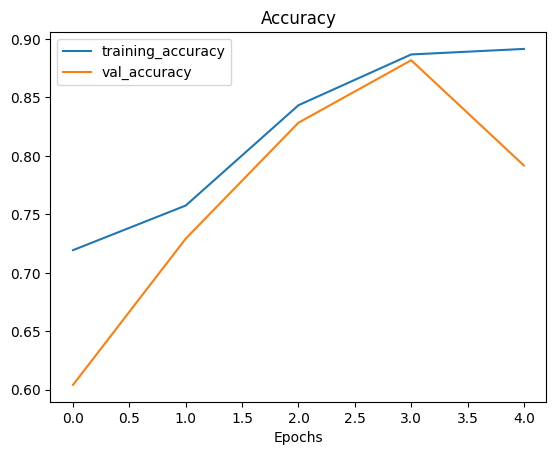

In [27]:
plot_loss_curves(history_6)

Model with data augmentaion and shuffle= True

In [28]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 5712 images belonging to 2 classes.


In [29]:
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 96s 519ms/step - accuracy: 0.7897 - loss: 0.5053 - val_accuracy: 0.8513 - val_loss: 0.3724
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 85s 471ms/step - accuracy: 0.9058 - loss: 0.2545 - val_accuracy: 0.8848 - val_loss: 0.3818
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 88s 489ms/step - accuracy: 0.9150 - loss: 0.2388 - val_accuracy: 0.7826 - val_loss: 0.6314
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 88s 494ms/step - accuracy: 0.9275 - loss: 0.2206 - val_accuracy: 0.8856 - val_loss: 0.4182
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 87s 487ms/step - accuracy: 0.9400 - loss: 0.1869 - val_accuracy: 0.9069 - val_loss: 0.3812


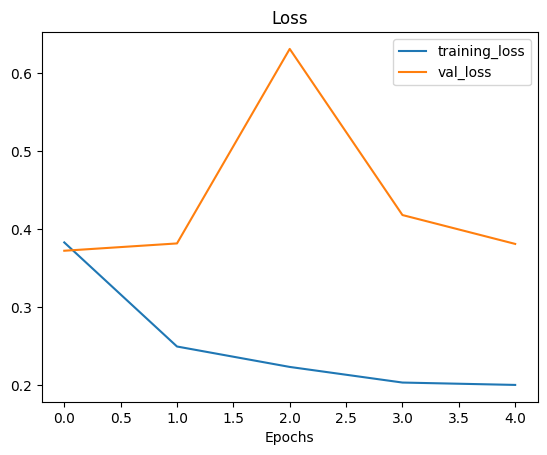

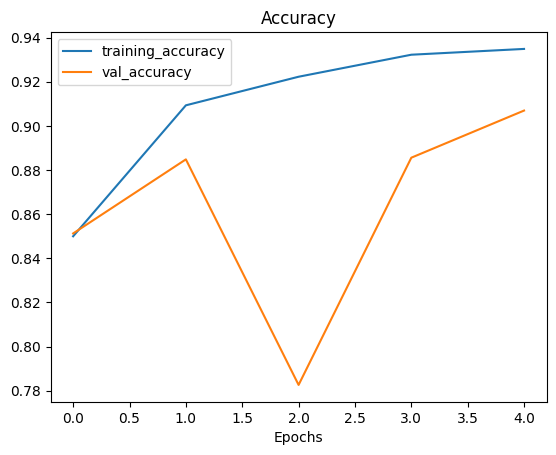

In [30]:
plot_loss_curves(history_7)

In [31]:
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 95s 516ms/step - accuracy: 0.7352 - loss: 0.5483 - val_accuracy: 0.7696 - val_loss: 0.6366
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 95s 531ms/step - accuracy: 0.9104 - loss: 0.2619 - val_accuracy: 0.8314 - val_loss: 0.5254
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 93s 521ms/step - accuracy: 0.9195 - loss: 0.2352 - val_accuracy: 0.8772 - val_loss: 0.4554
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 95s 529ms/step - accuracy: 0.9346 - loss: 0.1966 - val_accuracy: 0.8345 - val_loss: 0.5321
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 97s 541ms/step - accuracy: 0.9364 - loss: 0.1887 - val_accuracy: 0.8520 - val_loss: 0.4880


In [32]:
model_8.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

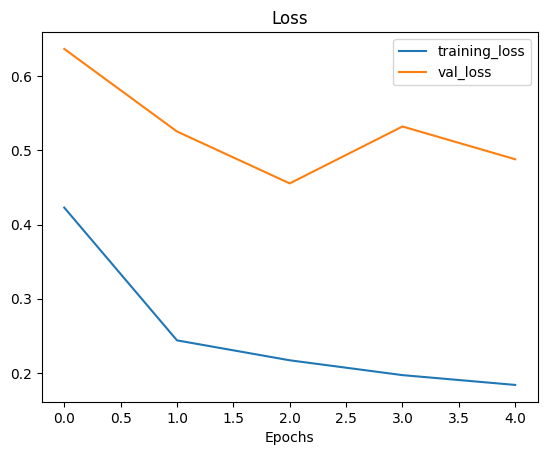

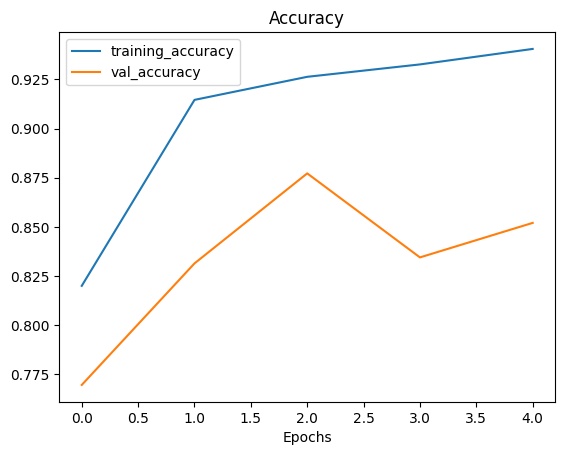

In [33]:
plot_loss_curves(history_8)

##Importing image (User input)

In [34]:
brain = mpimg.imread("/content/6 no.jpg")
plt.imshow(brain)
plt.axis(False);

FileNotFoundError: [Errno 2] No such file or directory: '/content/6 no.jpg'

In [ ]:
# import and resize
def load_and_prep_image(filename, img_shape=224):

  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  img = img/255.
  img = tf.expand_dims(img, axis=0)
  return img

brain = load_and_prep_image("/content/6 no.jpg")

In [ ]:
pred = model_4.predict(brain)
pred

In [ ]:
print(class_names)

In [ ]:
def pred_and_plot(model, filename, class_names):

  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [224, 224])
  img = img/255.

  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred)[0][0])]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
pred_and_plot(model_4, "/content/6 no.jpg", class_names)

In [ ]:
pred_and_plot(model_4, "/content/N1.JPG", class_names)

In [ ]:
pred_and_plot(model_4, "/content/Y185.jpg", class_names)

In [ ]:
pred_and_plot(model_4, "/content/Y33.jpg", class_names)

#Transfer Learning

In [36]:
def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


In [ ]:

import tensorflow as tf
IMG_SIZE = (224, 224) 
train_data= tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="binary", 
                                                                            batch_size=32) 
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="binary")

Found 5712 files belonging to 2 classes.
Found 1311 files belonging to 2 classes.


In [38]:
train_data.class_names

['absent', 'present']

In [39]:
# See an example batch of data
for images, labels in train_data.take(1):
  print(images, labels)

tf.Tensor(
[[[[135.66072   135.66072   135.66072  ]
   [135.66072   135.66072   135.66072  ]
   [135.66072   135.66072   135.66072  ]
   ...
   [135.23376   135.23376   135.23376  ]
   [144.06783   144.06783   144.06783  ]
   [151.9509    151.9509    151.9509   ]]

  [[ 73.4509     73.4509     73.4509   ]
   [ 73.4509     73.4509     73.4509   ]
   [ 73.4509     73.4509     73.4509   ]
   ...
   [ 76.06121    76.06121    76.06121  ]
   [ 88.0382     88.0382     88.0382   ]
   [103.05357   103.05357   103.05357  ]]

  [[ 21.991074   21.991074   21.991074 ]
   [ 21.991074   21.991074   21.991074 ]
   [ 21.991074   21.991074   21.991074 ]
   ...
   [ 23.195782   23.195782   23.195782 ]
   [ 36.883507   36.883507   36.883507 ]
   [ 59.544643   59.544643   59.544643 ]]

  ...

  [[  0.          0.          0.       ]
   [  0.          0.          0.       ]
   [  0.          0.          0.       ]
   ...
   [  4.0558167   4.0558167   4.0558167]
   [  5.971298    5.971298    5.971298 ]
   [ 

##First model

In [41]:
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

x = base_model(inputs)
print(f"Shape after base_model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")(x)

model_9 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_9.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 10. Fit the model 
history_10_percent = model_9.fit(train_data,
                                 epochs=5,
                                 steps_per_epoch=len(train_data),
                                 validation_data=test_data,
                                 validation_steps=int(0.25 * len(test_data)),
                                 )

Shape after base_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)
Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 129s 629ms/step - accuracy: 0.8502 - loss: 0.3366 - val_accuracy: 0.9500 - val_loss: 0.1437
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 133s 745ms/step - accuracy: 0.9647 - loss: 0.1149 - val_accuracy: 0.9438 - val_loss: 0.1374
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 113s 634ms/step - accuracy: 0.9770 - loss: 0.0833 - val_accuracy: 0.9500 - val_loss: 0.1242
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 169s 944ms/step - accuracy: 0.9764 - loss: 0.0736 - val_accuracy: 0.9531 - val_loss: 0.1088
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 125s 700ms/step - accuracy: 0.9815 - loss: 0.0640 - val_accuracy: 0.9563 - val_loss: 0.1048


In [42]:
# Check layers in our base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_layer_9
1 rescaling_1
2 normalization_1
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_con

In [43]:
base_model.summary()

Model: "efficientnetv2-b0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, None,      │          0 │ input_layer_9[0]… │
│ (Rescaling)         │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, None,      │          0 │ rescaling_1[0][0] │
│ (Normalization)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, None,      │        864 │ normalization_1[… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, None,      │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, None,      │          0 │ stem_bn[0][0]     │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, None,      │      4,608 │ stem_activation[… │
│ (Conv2D)            │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, None,      │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, None,      │          0 │ block1a_project_… │
│ (Activation)        │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, None,      │      9,216 │ block1a_project_… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, None,      │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, None,      │          0 │ block2a_expand_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_co… │ (None, None,      │      2,048 │ block2a_expand_a… │
│ (Conv2D)            │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_bn  │ (None, None,      │        128 │ block2a_project_… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_conv │ (None, None,      │     36,864 │ block2a_project_… │
│ (Conv2D)            │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_bn   │ (None, None,      │        512 │ block2b_expand_c… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_act… │ (None, None,      │          0 │ block2b_expand_b

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 5,919,312 (22.58 MB)

In [44]:
model_9.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 7, 7, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,923,157 (22.60 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

 Optimizer params: 2,564 (10.02 KB)

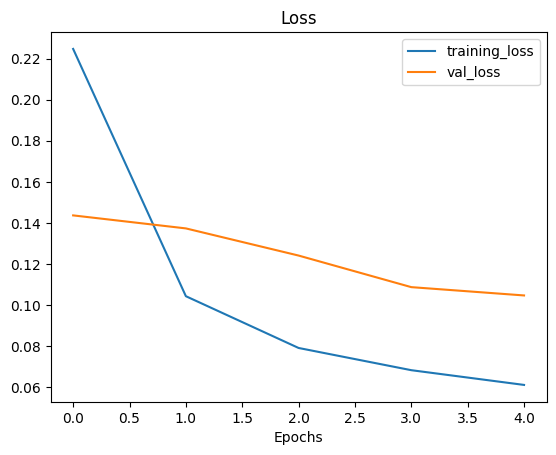

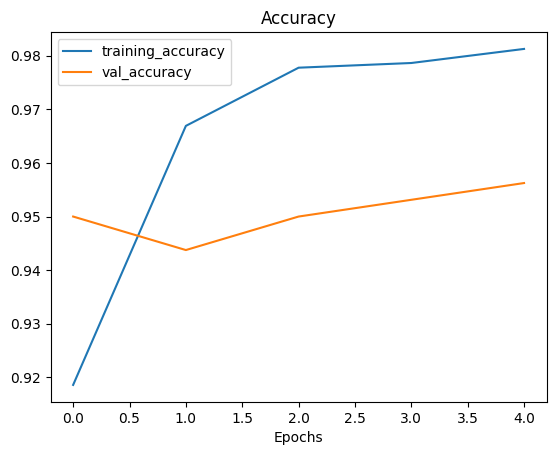

In [45]:
plot_loss_curves(history_10_percent)

##Model Second


In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
  layers.Input(shape=(224, 224, 3)),
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
], name ="data_augmentation")



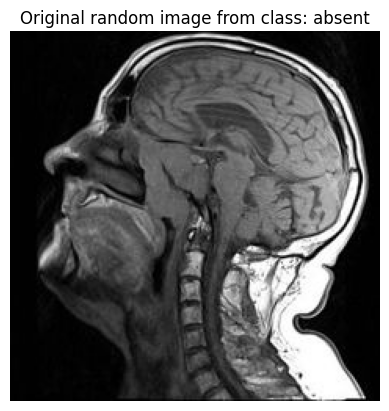

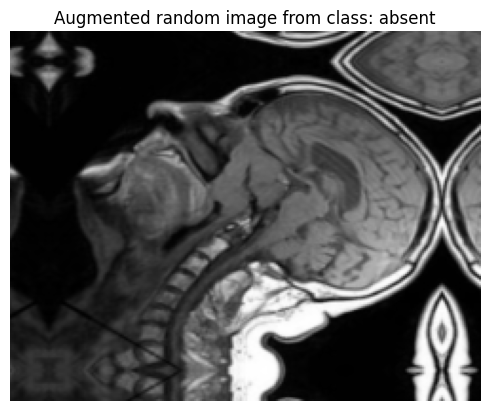

In [47]:
# View a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data.class_names)
target_dir = "braintumor3/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image 
img = mpimg.imread(random_image_path) 
plt.imshow(img) 
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); 

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) 
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

In [48]:
def create_base_model(input_shape: tuple[int, int, int] = (224, 224, 3),
                      output_shape: int = 1,
                      learning_rate: float = 0.001,
                      training: bool = False) -> tf.keras.Model:

    # Create base model
    base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
    base_model.trainable = training

    # Setup model input and outputs with data augmentation built-in
    inputs = layers.Input(shape=input_shape, name="input_layer")
    x = data_augmentation(inputs)
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
    outputs = layers.Dense(units=output_shape, activation="sigmoid", name="output_layer")(x)
    model = tf.keras.Model(inputs, outputs)

    # Compile model
    model.compile(loss="binary_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=["accuracy"])

    return model



In [49]:
model_10 = create_base_model()

In [50]:
# Setup checkpoint path

checkpoint_path = "model_checkpoints_weights/checkpoint.weights.h5"

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, 
                                                         save_best_only=True, 
                                                         save_freq="epoch", 
                                                         verbose=1)

In [51]:
# Fit the model saving checkpoints every epoch
initial_epochs = 5
history_10_percent_data_aug = model_10.fit(train_data,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)), 
                                          callbacks=[checkpoint_callback])

Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8255 - loss: 0.4040
Epoch 1: val_loss improved from inf to 0.19879, saving model to model_checkpoints_weights/checkpoint.weights.h5
179/179 ━━━━━━━━━━━━━━━━━━━━ 244s 1s/step - accuracy: 0.8259 - loss: 0.4034 - val_accuracy: 0.9344 - val_loss: 0.1988
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9428 - loss: 0.1763
Epoch 2: val_loss improved from 0.19879 to 0.16240, saving model to model_checkpoints_weights/checkpoint.weights.h5
179/179 ━━━━━━━━━━━━━━━━━━━━ 222s 1s/step - accuracy: 0.9428 - loss: 0.1762 - val_accuracy: 0.9406 - val_loss: 0.1624
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9529 - loss: 0.1425
Epoch 3: val_loss improved from 0.16240 to 0.15233, saving model to model_checkpoints_weights/checkpoint.weights.h5
179/179 ━━━━━━━━━━━━━━━━━━━━ 272s 2s/step - accuracy: 0.9530 - loss: 0.1424 - val_accuracy: 0.9531 - val_loss: 0.1523
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step 

In [52]:
model_10.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, None, None,     │     5,919,312 │
│                                 │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,923,157 (22.60 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

 Optimizer params: 2,564 (10.02 KB)

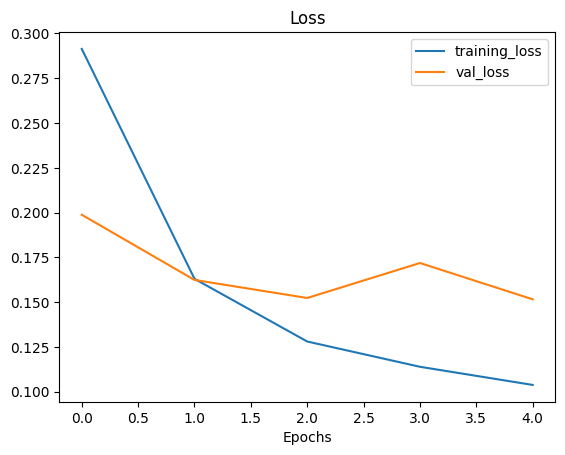

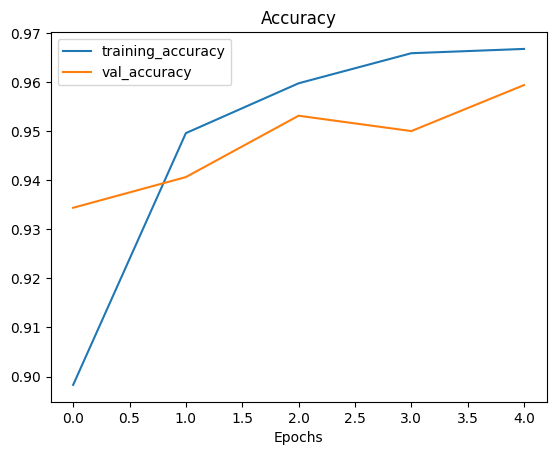

In [53]:
plot_loss_curves(history_10_percent_data_aug)

In [54]:
# Load in saved model weights and evaluate model
model_10.load_weights(checkpoint_path)
loaded_weights_model_results = model_10.evaluate(test_data)

41/41 ━━━━━━━━━━━━━━━━━━━━ 22s 536ms/step - accuracy: 0.9516 - loss: 0.1532


##Model third

In [55]:
for layer_number, layer in enumerate(model_10.layers):
  print(f"Layer number: {layer_number} | Layer name: {layer.name} | Layer type: {layer} | Trainable? {layer.trainable}")

Layer number: 0 | Layer name: input_layer | Layer type: <InputLayer name=input_layer, built=True> | Trainable? True
Layer number: 1 | Layer name: data_augmentation | Layer type: <Sequential name=data_augmentation, built=True> | Trainable? True
Layer number: 2 | Layer name: efficientnetv2-b0 | Layer type: <Functional name=efficientnetv2-b0, built=True> | Trainable? False
Layer number: 3 | Layer name: global_average_pooling_layer | Layer type: <GlobalAveragePooling2D name=global_average_pooling_layer, built=True> | Trainable? True
Layer number: 4 | Layer name: output_layer | Layer type: <Dense name=output_layer, built=True> | Trainable? True


In [56]:
# Access the base_model layers of model_2
model_10_base_model = model_10.layers[2]
model_10_base_model.name

'efficientnetv2-b0'

In [57]:
# How many layers are trainable in our model_2_base_model?
print(len(model_10_base_model.trainable_variables)) 

0


In [58]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(model_10_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer_11 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_d

In [59]:
# Make all the layers in model_2_base_model trainable
model_10_base_model.trainable = True

# Freeze all layers except for the last 10
for layer in model_10_base_model.layers[:-10]:
  layer.trainable = False

# Recompile the whole model (always recompile after any adjustments to a model)
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])

In [60]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(model_10_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer_11 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_d

In [61]:
print(len(model_10.trainable_variables))

12


In [62]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_10_percent_data_aug = model_10.fit(train_data,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               initial_epoch=history_10_percent_data_aug.epoch[-1], # start from previous last epoch
                                               validation_steps=int(0.25 * len(test_data)))


Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 145s 748ms/step - accuracy: 0.9662 - loss: 0.1316 - val_accuracy: 0.9531 - val_loss: 0.1551
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 127s 711ms/step - accuracy: 0.9684 - loss: 0.0900 - val_accuracy: 0.9594 - val_loss: 0.0918
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 129s 721ms/step - accuracy: 0.9758 - loss: 0.0735 - val_accuracy: 0.9563 - val_loss: 0.1061
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 126s 704ms/step - accuracy: 0.9713 - loss: 0.0771 - val_accuracy: 0.9563 - val_loss: 0.1085
Epoch 9/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 124s 690ms/step - accuracy: 0.9772 - loss: 0.0655 - val_accuracy: 0.9563 - val_loss: 0.1071
Epoch 10/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 123s 688ms/step - accuracy: 0.9822 - loss: 0.0541 - val_accuracy: 0.9625 - val_loss: 0.0927


In [63]:
# Evaluate the model on the test data
results_fine_tune= model_10.evaluate(test_data)

41/41 ━━━━━━━━━━━━━━━━━━━━ 22s 526ms/step - accuracy: 0.9567 - loss: 0.0988


In [64]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.8982843160629272, 0.9495798349380493, 0.9597339034080505, 0.9658613204956055, 0.9667366743087769, 0.9674369692802429, 0.9730392098426819, 0.9772409200668335, 0.9742646813392639, 0.9788165092468262, 0.9831932783126831]


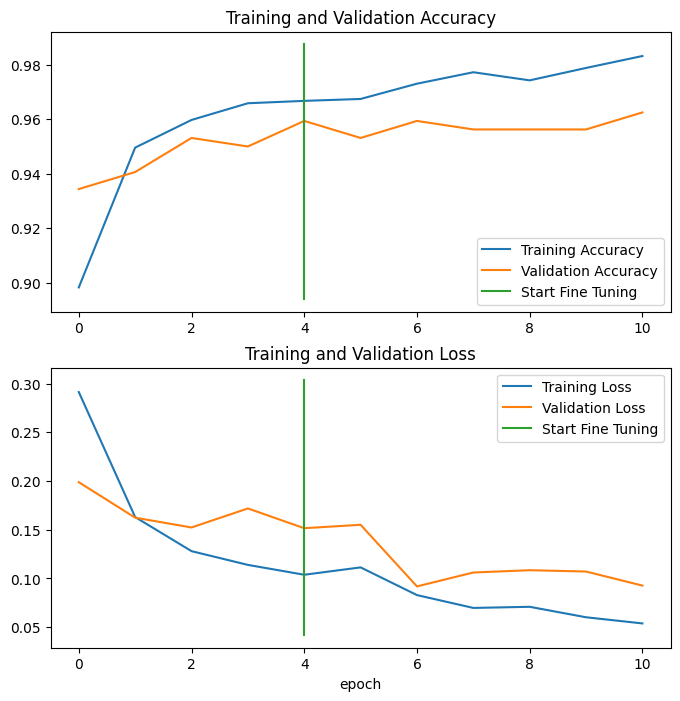

In [65]:
compare_historys(original_history=history_10_percent_data_aug,
                 new_history=history_fine_10_percent_data_aug,
                 initial_epochs=5)